Found 120 files belonging to 3 classes.
Using 84 files for training.
Found 120 files belonging to 3 classes.
Using 36 files for validation.
Epoch 1/2
3/3 [==============================] - 13s 4s/step - loss: 709.6616 - accuracy: 0.3810 - val_loss: 70.3202 - val_accuracy: 0.4722
Epoch 2/2
2/2 [==============================] - 1s 110ms/step - loss: 63.3770 - accuracy: 0.1944
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 dropout

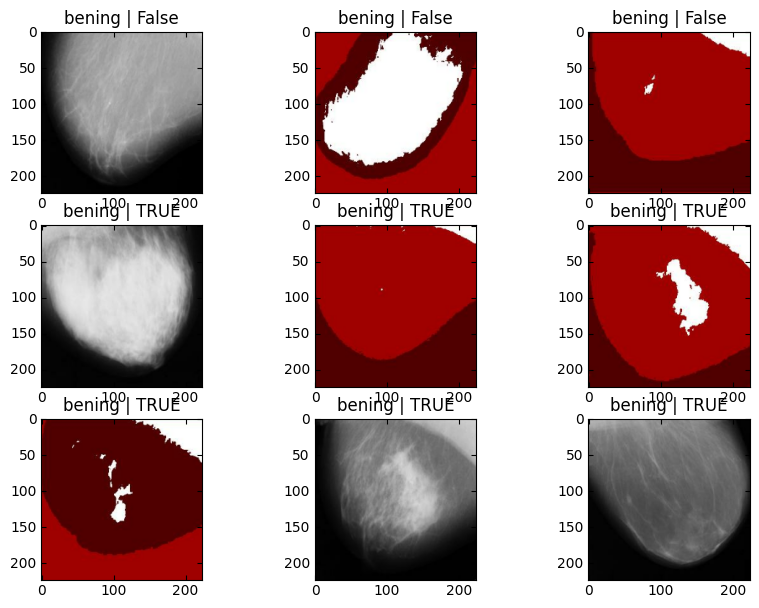

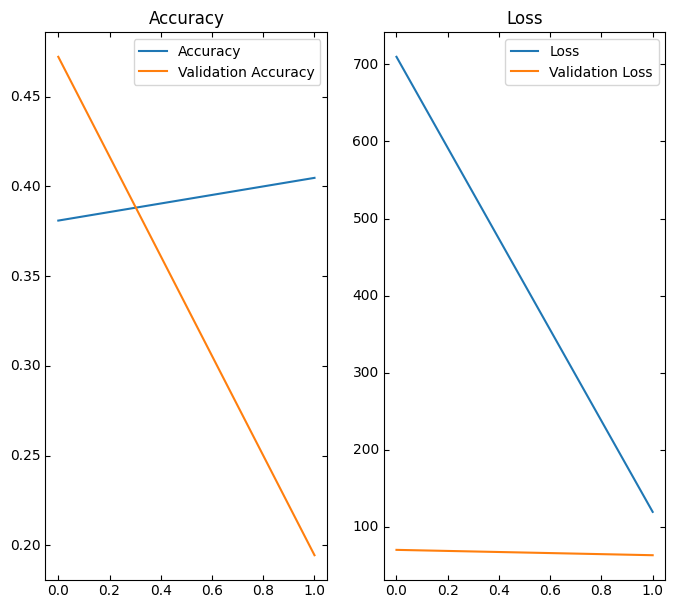

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from tkinter import *
from tkinter import filedialog
import tkinter  as tk
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk)
import tensorflow as tf
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random
from pathlib import Path
import imghdr
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
import warnings
from zipfile import ZipFile
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot
def knn():
    def browseFiles():
        ftypes = [('CSV',".csv"),('All',".*")]
        file = filedialog.askopenfilename(filetypes=ftypes)
        d=pd.read_csv(file)
        x=d.iloc[:,2:32]
        y=d.iloc[:,1]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
        knn= KNeighborsClassifier(n_neighbors = 21)
        knn.fit(x_train, y_train)
        pred=knn.predict(x_test)
        acc=metrics.accuracy_score(y_test,pred)*100
        cm=metrics.confusion_matrix(y_test,pred)
        l1 = tk.Label(window1,text='Accuracy',width=30,anchor=CENTER,font=("Times","15"))
        l1.place(relx = 0.4,rely = 0.3)
        text = Text(window1, width=16, height=1 )
        text.place(relx = 0.5,rely = 0.4)
        text.insert(INSERT, acc)
        l2 = tk.Label(window1,text='Confusion Matrix',width=30,anchor=CENTER,font=("Times","15"))
        l2.place(relx = 0.4,rely = 0.5)
        text = Text(window1, width=16, height=2 )
        text.place(relx = 0.5,rely = 0.6)
        text.insert(INSERT, cm)
    
    window1 = Toplevel(window)
    window1.title("DETECTION USING KNN ALGORITHM")
    window1.geometry("1000x1000")
    l1 = tk.Label(window1,text='BREAST CANCER DETECTION USING KNN ALGORITHM',width=70,font=("Times","20","bold"),anchor=CENTER)
    l1.pack()   
    lab1 = Label(window1,text='Upload your dataset as csv file',width=70,font=("Times","20"))
    lab1.place(relx = 0.0,rely = 0.1)
    button_explore = Button(window1,text = "Browse Files",command = browseFiles,anchor=CENTER,font=("Times","12"))
    button_explore.place(relx = 0.5,rely = 0.2)
def cnn():
    def browseFiles():
        def graph():
            newWindow1 = Toplevel(window2)
            newWindow1.title("Accuracy")
            newWindow1.geometry("1000x1000")
            l1=Label(newWindow1,text='Accuracy Vs Loss',width=70,font=("Times","20"),anchor=CENTER)
            l1.pack()
            fig=plt.figure(figsize=(8,8))
            ax = Subplot(fig, 121)
            fig.add_subplot(ax)
            ax.plot(epochs_range,acc,label='Accuracy')
            ax.plot(epochs_range,val_acc,label="Validation Accuracy")
            ax.set_title("Accuracy")
            ax.legend()
            bx = Subplot(fig, 122)
            fig.add_subplot(bx)
            bx.plot(epochs_range,loss,label='Loss')
            bx.plot(epochs_range,val_loss,label="Validation Loss")
            bx.set_title("Loss")
            bx.legend()
            canvas = FigureCanvasTkAgg(fig,master =  newWindow1)
            canvas.draw()
            canvas.get_tk_widget().pack()
        def image():
            newWindow2 = Toplevel(window2)
            newWindow2.title("Prediction")
            newWindow2.geometry("1000x1000")
            l1=Label(newWindow2,text='Random predicted images',width=70,font=("Times","20"),anchor=CENTER)
            l1.pack()
            figim=plt.figure(figsize=(10, 10))
            class_names = val_data.class_names
            result = ' | False'
            for images, labels in val_data.take(1):
                for i in range(9):
                    cx = Subplot(figim, 3,3, i + 1)
                    figim.add_subplot(cx)
                    img = images[i].numpy().astype("uint8")
                    img = tf.expand_dims(img, axis=0)
                    predictions = model.predict(img)
                    print( predictions)
                    predicted_class = np.argmax(predictions)
                    if class_names[predicted_class] == class_names[labels[i]]:
                        result = ' | TRUE'    
                    cx.imshow(images[i].numpy().astype("uint8"))
                    cx.set_title(class_names[predicted_class]+result  )
                    cx.axis("off")
            canvas = FigureCanvasTkAgg(figim,master =  newWindow2)
            canvas.draw()
            canvas.get_tk_widget().pack()

        filename = filedialog.askopenfilename(initialdir = "/",title = "Select a File",filetypes = (("Zip files",".zip"),("all files",".")))
        loc=filename
        ploc= pathlib.Path(loc)
        with ZipFile(loc) as zObject:
            zObject.extractall(path=r"C:\Users\ArunPooja\Desktop")
        warnings.filterwarnings('ignore')
        path = r"C:\Users\ArunPooja\Desktop"
        data_dir = pathlib.Path(path)
        pname=ploc.stem
        data_dir =os.path.join(data_dir,pname)
        class_names = np.array(('benign','malignant','normal'))
        image_extensions = [".png", ".jpg"]  # add there all your images file extensions
        img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
        for filepath in Path(data_dir).rglob("*"):
            if filepath.suffix.lower() in image_extensions:
                img_type = imghdr.what(filepath)
                if img_type is None:
                    print(f"{filepath} is not an image")
                elif img_type not in img_type_accepted_by_tf:
                    print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
        batch_size = 32
        img_height = 224
        img_width = 224
        train_data = image_dataset_from_directory(data_dir,validation_split=0.3,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
        val_data = image_dataset_from_directory(data_dir,validation_split=0.3,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)
        model=tf.keras.Sequential([layers.Conv2D(16, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)),
                                 layers.Conv2D(16,kernel_size=(3, 3), activation='relu',padding = 'Same',),
                                 layers.MaxPooling2D(),
                                 layers.Dropout(0.20),
                                 layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',),
                                 layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',),
                                 layers.MaxPooling2D(),
                                 layers.Dropout(0.40),
                                 layers.Flatten(),
                                 layers.Dense(128, activation='relu'),
                                 layers.Dense(9,activation="softmax")])
        model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
        epochs = 2
        history = model.fit(train_data,epochs=epochs,validation_data=val_data,batch_size=batch_size)
        history.history.keys()
        acc = history.history['accuracy']
        val_acc =  history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(epochs)
        model.evaluate(val_data)
        model.summary()
        l=Label(window2,text='Model Training done!',width=70,font=("Times","20","bold"),anchor=CENTER)
        l.place(relx = 0.0,rely = 0.3)
        b1=Button(window2,text = "Accuracy",command = graph,font=("Times","12"))
        b1.place(relx = 0.3,rely = 0.4)
        b2=Button(window2,text = "Prediction",command = image,font=("Times","12"))
        b2.place(relx = 0.7,rely = 0.4)
    window2 = Toplevel(window)
    window2.title('CNN Model')
    window2.geometry("1000x1000")
    lab = Label(window2,text='BREAST CANCER DETECTION USING CNN ALGORITHM',width=70,font=("Times","20","bold"))
    lab.place(relx = 0.0,rely = 0.0)
    lab1 = Label(window2,text='Upload your dataset as zip file',width=70,font=("Times","20"))
    lab1.place(relx = 0.0,rely = 0.1)
    button_explore = Button(window2,text = "Browse Files",command = browseFiles,anchor=CENTER,font=("Times","12"))
    button_explore.place(relx = 0.5,rely = 0.2)
window = Tk()
window.title('BREAST CANCER DETECTION')
window.geometry("1000x1000")
l3 = tk.Label(window,text='BREAST CANCER DETECTION',width=70,font=("Times","20","bold"),anchor=CENTER)
l3.pack()
lab1 = Label(window,text='select the algorithm by which u want to calculate',width=70,font=("Times","20"))
lab1.place(relx = 0.0,rely = 0.1)
button_explore = Button(window,text = "KNN",command = knn,anchor=CENTER,font=("Times","12"))
button_explore.place(relx = 0.5,rely = 0.2)
button_explore1 = Button(window,text = "CNN",command = cnn,anchor=CENTER,font=("Times","12"))
button_explore1.place(relx = 0.5,rely = 0.3)
window.mainloop()